In [721]:
!pip install -q wordcloud emoji 

In [722]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [723]:
import emoji
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# this is a sky
# ['this','is','a','sky']
nltk.download('punkt_tab')
nltk.download('wordnet') # lemmatizer

from nltk.corpus import stopwords #corpora

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# this is a sky
# ['this','is','a','sky']

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pramodnelavalli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pramodnelavalli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/pramodnelavalli/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pramodnelavalli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [724]:
combined_df = pd.read_csv("tamil_movie_reviews_test.csv")

In [726]:
combined_df.head()

,ReviewId,ReviewInTamil,Rating
0,521,லாரன்ஸுக்கும் பேய்க்கும் எப்போதும் ஒரு வெற்றி ...,2.75
1,266,கரு : இன்றைய சூழலில் சமூக வலைதளங்களால் சமூகத்த...,2.00
2,127,கதை: வசதியற்ற சாதாரண குடும்பத்தை சேர்ந்த நாயகர...,2.00
3,528,தமிழ் சினிமாவில் இயக்குனர்களுக்காக ஒரு சிலர் ப...,2.00
4,260,கரு : 'வேலையில்லா பட்டதாரி' படத்தின் பகுதி - 2...,2.50


In [728]:
combined_df = combined_df[['ReviewId' , 'ReviewInTamil']]
combined_df.head()

,ReviewId,ReviewInTamil
0,521,லாரன்ஸுக்கும் பேய்க்கும் எப்போதும் ஒரு வெற்றி ...
1,266,கரு : இன்றைய சூழலில் சமூக வலைதளங்களால் சமூகத்த...
2,127,கதை: வசதியற்ற சாதாரண குடும்பத்தை சேர்ந்த நாயகர...
3,528,தமிழ் சினிமாவில் இயக்குனர்களுக்காக ஒரு சிலர் ப...
4,260,கரு : 'வேலையில்லா பட்டதாரி' படத்தின் பகுதி - 2...


In [733]:
combined_df.shape

(121, 2)

In [734]:
combined_df.info

<bound method DataFrame.info of      ReviewId                                      ReviewInTamil
0         521  லாரன்ஸுக்கும் பேய்க்கும் எப்போதும் ஒரு வெற்றி ...
1         266  கரு : இன்றைய சூழலில் சமூக வலைதளங்களால் சமூகத்த...
2         127  கதை: வசதியற்ற சாதாரண குடும்பத்தை சேர்ந்த நாயகர...
3         528  தமிழ் சினிமாவில் இயக்குனர்களுக்காக ஒரு சிலர் ப...
4         260  கரு : 'வேலையில்லா பட்டதாரி' படத்தின் பகுதி - 2...
..        ...                                                ...
116       474  விக்ரம் பிரபு ஒரு வெற்றி கொடுத்தே ஆகவேண்டும் எ...
117       388  தளபதி விஜய் மற்றும் முருகதாஸ் கூட்டணி மீண்டும்...
118       446  Read Adhe Kangal Review in English<NEWLINE>தமி...
119        37  கரு : வாழ்க்கையில் எதுவேண்டுமனாலும் நடக்கலாம்,...
120       218  கரு: ஊக்க மருந்தால் உலகத்தை ஆள நினைக்கும் வில்...

[121 rows x 2 columns]>

In [736]:
def clean_text(text, remove_stopwords=True):
    text = text.lower()
    if True:
        #text= "i dont't have supercar"
        text = text.split()
        # ['i','don't','have','supercar']
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
                # ['i','do not','have','supercar']
            else:
                new_text.append(word)
        text = " ".join(new_text)
        #[i do not have supercar]

    # Remove URLs
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Remove usernames
    text = re.sub(r'@[A-Za-z0-9]+', '', text)

    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    # Remove emojis
    emoji_pattern = re.compile("[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF" \
                               "\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF" \
                               "\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF" \
                               "\U00002702-\U000027B0\U000024C2-\U0001F251]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords if needed
    if remove_stopwords:
        stop_words = set(stopwords.words("Tamil"))
        words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(words)


In [739]:
# conractions in tamil
contractions = {
    "நான்'னு": "நான் என்று",
    "இவ'னு": "இவன் என்று",
    "அவ'னு": "அவன் என்று",
    "என்ன'னு": "என்ன என்று",
    "எப்ப'டி": "எப்படி",
    "எவ்ளோ": "எவ்வளவு",
    "சொன்னா'தான்": "சொன்னால்தான்",
    "இருக'குது": "இருக்கிறது",
    "போற'து": "போகிறது",
    "வந்தா'தான்": "வந்தால்தான்",
    "சாப்பிட'ல": "சாப்பிடவில்லை",
    "பாக்க'ல": "பார்க்கவில்லை"
}


In [741]:
combined_df['clean_ReviewInTamil'] = combined_df['ReviewInTamil'].apply(lambda x: clean_text(str(x)))


In [743]:
def expand_tamil_contractions(text):
    words = text.split()
    expanded_words = [tamil_contractions[word] if word in tamil_contractions else word for word in words]
    return " ".join(expanded_words)


In [745]:
non_string_values = combined_df[~combined_df['ReviewId'].apply(lambda x: isinstance(x, str))]
print(non_string_values)


     ReviewId                                      ReviewInTamil  \
0         521  லாரன்ஸுக்கும் பேய்க்கும் எப்போதும் ஒரு வெற்றி ...   
1         266  கரு : இன்றைய சூழலில் சமூக வலைதளங்களால் சமூகத்த...   
2         127  கதை: வசதியற்ற சாதாரண குடும்பத்தை சேர்ந்த நாயகர...   
3         528  தமிழ் சினிமாவில் இயக்குனர்களுக்காக ஒரு சிலர் ப...   
4         260  கரு : 'வேலையில்லா பட்டதாரி' படத்தின் பகுதி - 2...   
..        ...                                                ...   
116       474  விக்ரம் பிரபு ஒரு வெற்றி கொடுத்தே ஆகவேண்டும் எ...   
117       388  தளபதி விஜய் மற்றும் முருகதாஸ் கூட்டணி மீண்டும்...   
118       446  Read Adhe Kangal Review in English<NEWLINE>தமி...   
119        37  கரு : வாழ்க்கையில் எதுவேண்டுமனாலும் நடக்கலாம்,...   
120       218  கரு: ஊக்க மருந்தால் உலகத்தை ஆள நினைக்கும் வில்...   

                                   clean_ReviewInTamil  
0    லாரன்ஸுக்கும் பேய்க்கும் எப்போதும் வெற்றி கனெக...  
1    கரு இன்றைய சூழலில் சமூக வலைதளங்களால் சமூகத்தில...  
2    கதை வசத

In [747]:
combined_df.drop_duplicates(inplace=True)

In [749]:
combined_df.head()

,ReviewId,ReviewInTamil,clean_ReviewInTamil
0,521,லாரன்ஸுக்கும் பேய்க்கும் எப்போதும் ஒரு வெற்றி ...,லாரன்ஸுக்கும் பேய்க்கும் எப்போதும் வெற்றி கனெக...
1,266,கரு : இன்றைய சூழலில் சமூக வலைதளங்களால் சமூகத்த...,கரு இன்றைய சூழலில் சமூக வலைதளங்களால் சமூகத்தில...
2,127,கதை: வசதியற்ற சாதாரண குடும்பத்தை சேர்ந்த நாயகர...,கதை வசதியற்ற சாதாரண குடும்பத்தை நாயகர் பிரித்வ...
3,528,தமிழ் சினிமாவில் இயக்குனர்களுக்காக ஒரு சிலர் ப...,தமிழ் சினிமாவில் இயக்குனர்களுக்காக சிலர் படம் ...
4,260,கரு : 'வேலையில்லா பட்டதாரி' படத்தின் பகுதி - 2...,கரு வேலையில்லா பட்டதாரி படத்தின் பகுதி 2 ஆக இய...


In [751]:
#Exploratory data analysis

In [753]:
combined_df["ReviewInTamil_length"]= combined_df["clean_ReviewInTamil"].str.len()

Text(0.5, 1.0, 'Distribution of the length of ReviewInTamil')

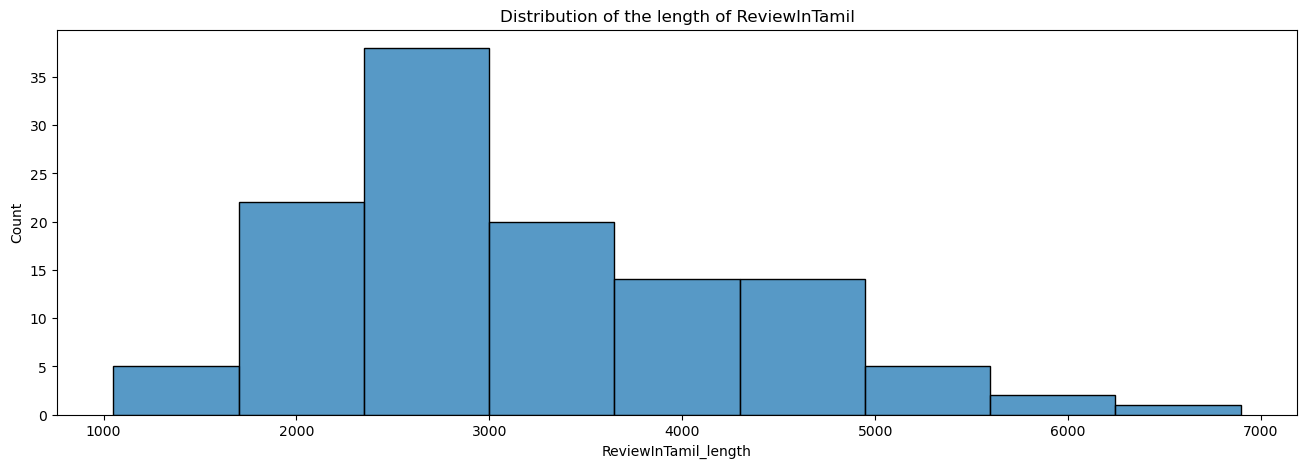

In [755]:
plt.figure(figsize=(16,5))
sns.histplot(combined_df['ReviewInTamil_length'])
plt.title("Distribution of the length of ReviewInTamil")

In [757]:
stopwords = set([
    "ஒரு", "இந்த", "அது", "அவர்", "அவர்கள்", "என்று", "மற்றும்",
    "ஆகிய", "உள்ள", "மட்டும்", "என்ன", "எப்படி", "எங்கே", "எது",
    "மிக", "அதில்", "இது", "அவை", "அதை", "தான்", "என", "அல்லது",
    "போன்ற", "வேண்டும்", "சரி", "உண்மை", "ஆனால்", "ஏன்", "மிகவும்",
    "உடன்", "பின்", "முதல்", "வரை", "நான்", "நீ", "நாம்", "நீங்கள்",
    "எனது", "உன்னுடைய", "அவரது", "அவளது", "அவர்களின்"
])


In [759]:
from collections import Counter

# Tokenize the text
tokens = word_tokenize(filtered_text)

# Create a frequency distribution
word_freq = Counter(tokens)

# Print the most common words
print(word_freq.most_common(20))  # Print top 20 words to check the frequency


[('<', 1858), ('newline', 1858), ('>', 1858), ('படம்', 259), ('படத்தின்', 214), ('கதை', 186), ('படத்தில்', 167), ('பலம்', 140), ('உள்ளிட்ட', 134), ('கொஞ்சம்', 123), ('காட்சிகள்', 122), ('விஜய்', 118), ('காதல்', 112), ('பலவீனம்', 109), ('இயக்குனர்', 103), ('பின்னணி', 93), ('மொத்தத்தில்', 92), ('quot', 91), ('தமிழ்', 90), ('இயக்கத்தில்', 89)]


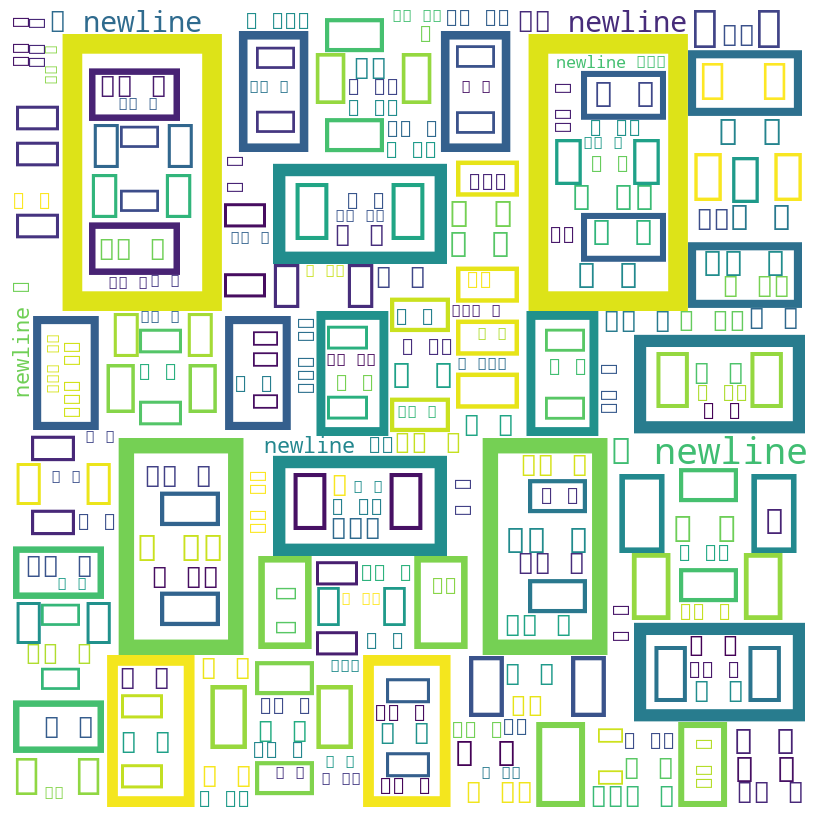

In [761]:
all_text = ' '.join(combined_df['clean_ReviewInTamil'])

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(all_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [762]:
# Hashtags analysis

In [765]:
def extract_hashtags(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [767]:
hashtags = extract_hashtags(combined_df['ReviewInTamil'])

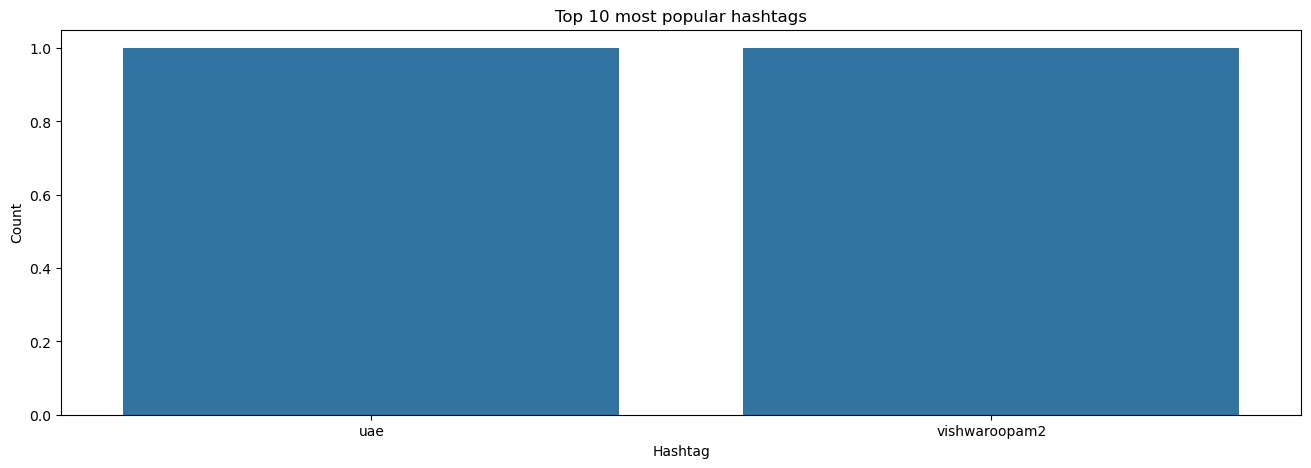

In [769]:
hashtags_lower = [[tag.lower() for tag in tag_list] for tag_list in hashtags]

combined_hashtags = sum(hashtags_lower, [])

# Compute frequency distribution
freq_dist = nltk.FreqDist(combined_hashtags)

# Convert frequency distribution to DataFrame
df_hashtags = pd.DataFrame({'Hashtag': list(freq_dist.keys()), 'Count': list(freq_dist.values())})

df_hashtags['Hashtag'] = df_hashtags['Hashtag'].apply(lambda x: x.lower())
df_hashtags = df_hashtags.groupby('Hashtag', as_index=False)['Count'].sum()

# Select top 10 most frequent hashtags
top_10_hashtags = df_hashtags.nlargest(columns="Count", n=10)

# Plot the top 10 most popular hashtags
plt.figure(figsize=(16,5))
ax = sns.barplot(data=top_10_hashtags, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.title("Top 10 most popular hashtags")
plt.show()

In [771]:
# N Gram Analysis

In [773]:
from nltk.util import ngrams
from collections import Counter

words = all_text.split()
bigram_freq = Counter(ngrams(words, 2))
bigram_freq_df = pd.DataFrame(list(bigram_freq.items()), columns=['Bigram', 'Frequency'])
bigram_freq_df = bigram_freq_df.sort_values(by='Frequency', ascending=False)

# Display the top N most frequent bigrams
top_N = 20
print(bigram_freq_df.head(top_N))

                         Bigram  Frequency
31                 (<, newline)       1858
32                 (newline, >)       1858
1913              (>, படத்தின்)         80
283            (>, மொத்தத்தில்)         64
308                    (>, கதை)         54
568                   (பலம், <)         50
589                (>, இயக்கம்)         50
569                   (>, பலம்)         50
662                  (>, பைனல்)         49
578                (>, பலவீனம்)         49
342       (>, காட்சிப்படுத்தல்)         47
481         (>, நட்சத்திரங்கள்)         47
588                (பலவீனம், <)         47
30              (பார்ப்போம், <)         46
523   (>, தொழில்நுட்பகலைஞர்கள்)         42
1067             (பைனல், பன்ச்)         42
407              (>, கதாநாயகர்)         38
2552             (பின்னணி, இசை)         38
89               (மீதிக்கதை, <)         36
1084        (தமிழ், சினிமாவில்)         34


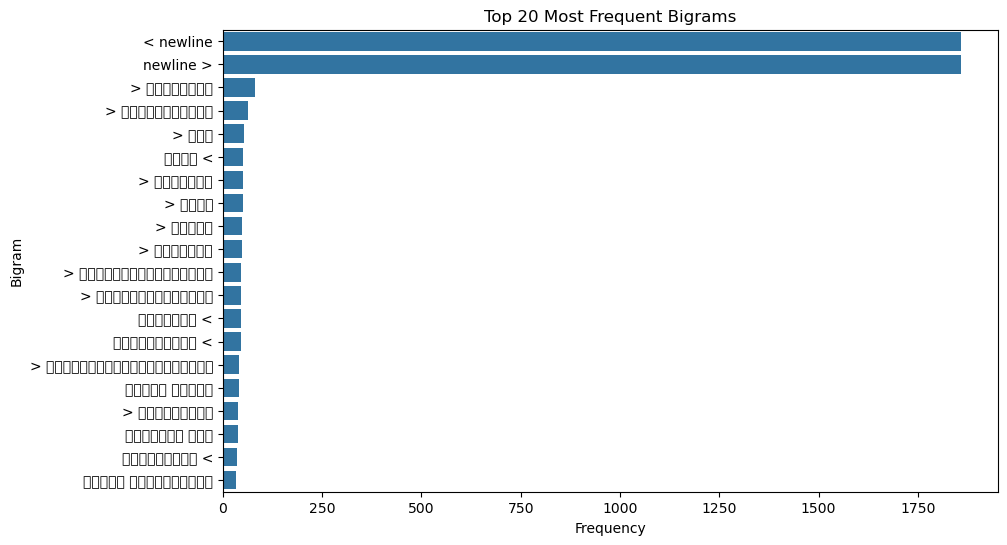

In [775]:
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y=[' '.join(bigram) for bigram in bigram_freq_df['Bigram'].head(top_N)],
            data=bigram_freq_df.head(top_N))
plt.title(f'Top {top_N} Most Frequent Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

In [777]:
trigram_freq = Counter(ngrams(words, 3))
trigram_freq_df = pd.DataFrame(list(trigram_freq.items()), columns=['Trigram', 'Frequency'])
trigram_freq_df = trigram_freq_df.sort_values(by='Frequency', ascending=False)

top_N = 20


print(trigram_freq_df.head(top_N))

                                 Trigram  Frequency
31                       (<, newline, >)       1858
2035              (newline, >, படத்தின்)         80
297            (newline, >, மொத்தத்தில்)         64
323                    (newline, >, கதை)         54
626                (newline, >, இயக்கம்)         50
604                   (newline, >, பலம்)         50
603                   (பலம், <, newline)         50
706                  (newline, >, பைனல்)         49
614                (newline, >, பலவீனம்)         49
359       (newline, >, காட்சிப்படுத்தல்)         47
625                (பலவீனம், <, newline)         47
507         (newline, >, நட்சத்திரங்கள்)         47
30              (பார்ப்போம், <, newline)         46
554   (newline, >, தொழில்நுட்பகலைஞர்கள்)         42
1136                   (>, பைனல், பன்ச்)         42
427              (newline, >, கதாநாயகர்)         38
92               (மீதிக்கதை, <, newline)         36
48                   (newline, >, ஆனால்)         30
440         

In [779]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Tokenize and vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(combined_df['clean_ReviewInTamil'])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42) # Topic modelling
lda_output = lda_model.fit_transform(X)

In [780]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the topics
print("Topics found via LDA:")
no_top_words = 10
display_topics(lda_model, vectorizer.get_feature_names_out(), no_top_words)

Topics found via LDA:
Topic 1:
என இல இச அர படம ரச கண ரன மல அன
Topic 2:
quot மன கர டன தல ரச கட இயக கம யக
Topic 3:
படம டன அவர என இவர ஆண தன வந இப யம
Topic 4:
அத வத படம டம கல தன கர என கம அட
Topic 5:
தல கர இயக ரம டன உள கம என கவ கட


In [783]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pramodnelavalli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

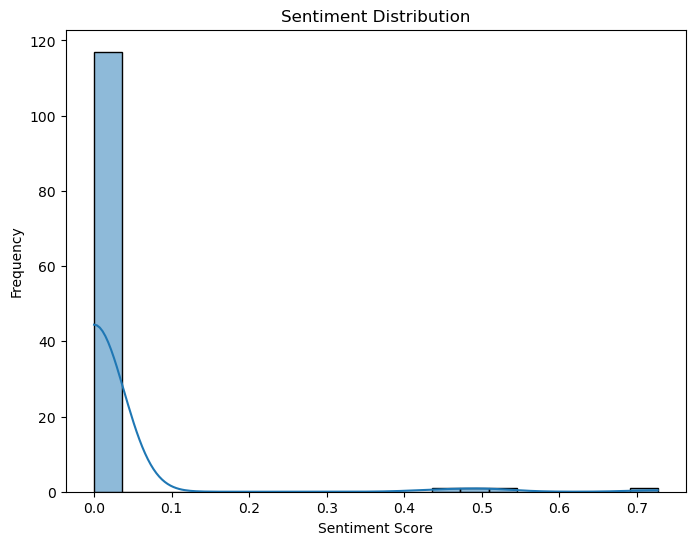

In [785]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer() #vader-sentiment-analyzer

# Compute sentiment scores for each tweet
combined_df['sentiment'] = combined_df['clean_ReviewInTamil'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [787]:
#Tf-IDF vectorizer

In [789]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
# max-   maximum no of dcment a term can appear
# min-   minimum no of ducment a term can appear

In [791]:

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df['clean_ReviewInTamil'])

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get top keywords for each tweet
top_keywords = []
for i in range(len(combined_df)):
    feature_index = tfidf_matrix[i,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
    top_keywords.append(sorted([(feature_names[i], s) for (i, s) in tfidf_scores], key=lambda x: x[1], reverse=True)[:5])

# Display top keywords
combined_df['top_keywords'] = top_keywords
combined_df[['clean_ReviewInTamil', 'top_keywords']].head(10)

,clean_ReviewInTamil,top_keywords
0,லாரன்ஸுக்கும் பேய்க்கும் எப்போதும் வெற்றி கனெக...,"[(ரன, 0.3217773261005972), (சக, 0.305262710018..."
1,கரு இன்றைய சூழலில் சமூக வலைதளங்களால் சமூகத்தில...,"[(quot, 0.8805457784732801), (இண, 0.2318215572..."
2,கதை வசதியற்ற சாதாரண குடும்பத்தை நாயகர் பிரித்வ...,"[(ஜன, 0.4157170472584658), (தல, 0.313204631793..."
3,தமிழ் சினிமாவில் இயக்குனர்களுக்காக சிலர் படம் ...,"[(சரண, 0.5823357940119932), (எதற, 0.2114421304..."
4,கரு வேலையில்லா பட்டதாரி படத்தின் பகுதி 2 ஆக இய...,"[(கஜ, 0.48028177877874184), (தன, 0.29447473645..."
5,தமிழ் சினிமாவில் சிலருக்கு தொட்டதெல்லாம் வெற்ற...,"[(வக, 0.45733694314475715), (யன, 0.44466388674..."
6,read vanamagan review in english < newline > த...,"[(ரவ, 0.45151096003042335), (வனமகன, 0.40652388..."
7,தமிழ் சினிமாவில் எப்போதும் நடிகர்களுக்காகவே பட...,"[(ஃப, 0.36671043837715683), (அவர, 0.3629188203..."
8,மெர்சலா வாரங்க கூடவே நாங்களும் துள்ளி வரோம் மே...,"[(பவ, 0.46557886686489736), (ரள, 0.33539421523..."
9,கரு நம்பர் ஒன் விருது பெற எதையும் செய்யும் வில...,"[(ளதம, 0.5533640336421205), (தல, 0.19389389947..."
